# CODESOFT TASK-3

# Spam SMS Detection

Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [57]:
Data=pd.read_csv("spam.csv",encoding='latin-1')

 first five rows of dataset

In [58]:
Data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


dropping some columns

In [60]:
Data=Data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

Information of dataset

In [61]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [62]:
Data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Dimensions of dataset

In [63]:
Data.shape

(5572, 2)

Missing value Treatment

In [64]:
Data.isnull().sum()

v1    0
v2    0
dtype: int64

In [65]:
Data.columns

Index(['v1', 'v2'], dtype='object')

renaming the columns

In [66]:
Data=Data.rename(columns={'v1':"class",'v2':"text"})

In [67]:
Data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualization

Univariate Analysis

Frequency table for class variable

In [68]:
Data['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

Barplot

<Axes: >

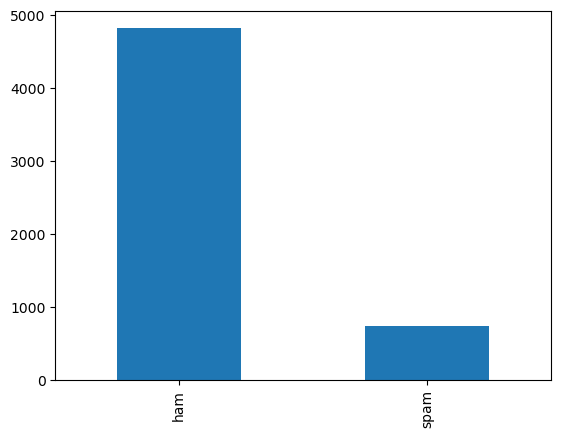

In [69]:
Data['class'].value_counts().plot.bar()

Bivariate analysis

Two way table

In [70]:
pd.crosstab(Data['class'],Data['text'])

text,&lt;#&gt; in mca. But not conform.,&lt;#&gt; mins but i had to stop somewhere first.,&lt;DECIMAL&gt; m but its not a common car here so its better to buy from china or asia. Or if i find it less expensive. I.ll holla,and picking them up from various points,"came to look at the flat, seems ok, in his 50s? * Is away alot wiv work. Got woman coming at 6.30 too.",gonna let me know cos comes bak from holiday that day. is coming. Don't4get2text me number.,"said kiss, kiss, i can't do the sound effects! He is a gorgeous man isn't he! Kind of person who needs a smile to brighten his day!","says that he's quitting at least5times a day so i wudn't take much notice of that. Nah, she didn't mind. Are you gonna see him again? Do you want to come to taunton tonight? U can tell me all about !",what number do u live at? Is it 11?,&lt;#&gt; am I think? Should say on syllabus,...,ÌÏ only send me the contents page...,ÌÏ predict wat time Ì_'ll finish buying?,ÌÏ ready then call me...,ÌÏ say until like dat i dun buy ericsson oso cannot oredi lar...,ÌÏ still attending da talks?,ÌÏ still got lessons? ÌÏ in sch?,ÌÏ takin linear algebra today?,ÌÏ thk of wat to eat tonight.,ÌÏ v ma fan...,ÌÏ wait 4 me in sch i finish ard 5..
class,,,,,,,,,,,,,,,,,,,,,
ham,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
spam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from scipy.stats import chi2_contingency

In [72]:
chi2_contingency(pd.crosstab(Data['class'],Data['text']))

Chi2ContingencyResult(statistic=5571.999999999999, pvalue=5.196282274479093e-05, dof=5168, expected_freq=array([[0.86593683, 0.86593683, 0.86593683, ..., 0.86593683, 0.86593683,
        0.86593683],
       [0.13406317, 0.13406317, 0.13406317, ..., 0.13406317, 0.13406317,
        0.13406317]]))

Here, pvalue is less the 0.05 ham sms are more than spam sms

Data Preprocessing

In [73]:
Data.loc[Data["class"]=="spam","class"]=1

In [74]:
Data.loc[Data["class"]=="ham","class"]=0

Splitting data

In [75]:
x=Data['text']

In [76]:
y=Data['class']

In [77]:
print(x)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


In [78]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: class, Length: 5572, dtype: object


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [81]:
print(x_train.shape),print(x_test.shape),print(y_train.shape),print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


(None, None, None, None)

Feature Extraction

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
fe=TfidfVectorizer(stop_words="english",lowercase=True)

In [84]:
x_trainf=fe.fit_transform(x_train)

In [85]:
x_testf=fe.transform(x_test)

In [86]:
# convert data type of y_train & y_test into int
y_train=y_train.astype("int")
y_test=y_test.astype("int")

Model fitting

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lg=LogisticRegression()

In [89]:
lg.fit(x_trainf,y_train)

LogisticRegression()

Prediction of train dataset

In [90]:
pred=lg.predict(x_trainf)

Accuracy of train dataset

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_train,pred)

0.9683643706529056

Prediction of test dataset

In [93]:
pred_test=lg.predict(x_testf)

Accuracy of test dataset

In [94]:
accuracy_score(y_test,pred_test)

0.9497757847533632

Confusion matrix

In [95]:
from sklearn.metrics import confusion_matrix

<Axes: >

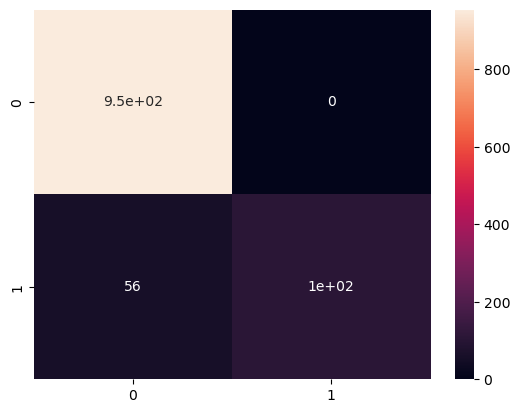

In [96]:
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True)